In [2]:
import sys
sys.path.append('/Users/tristenmarto/Documents/Studie/Thesis/Synthsonic_data_analysis')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from Evaluation import synthsonic

from collections import Counter

from imblearn.datasets import fetch_datasets

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

import smote_variants as sv
import xgboost as xgb

from imblearn.metrics import geometric_mean_score, classification_report_imbalanced

from sklearn.model_selection import cross_validate, train_test_split
from sklearn.metrics import (recall_score, roc_auc_score, confusion_matrix, precision_score, precision_recall_curve,
                             f1_score, balanced_accuracy_score, accuracy_score, average_precision_score)

In [4]:
datasets = fetch_datasets()

In [96]:
datasets.keys()

odict_keys(['ecoli', 'optical_digits', 'satimage', 'pen_digits', 'abalone', 'sick_euthyroid', 'spectrometer', 'car_eval_34', 'isolet', 'us_crime', 'yeast_ml8', 'scene', 'libras_move', 'thyroid_sick', 'coil_2000', 'arrhythmia', 'solar_flare_m0', 'oil', 'car_eval_4', 'wine_quality', 'letter_img', 'yeast_me2', 'webpage', 'ozone_level', 'mammography', 'protein_homo', 'abalone_19'])

In [5]:
data = datasets['ecoli']

In [6]:
X,y = data['data'], data['target']

In [7]:
data

{'data': array([[0.49, 0.29, 0.48, ..., 0.56, 0.24, 0.35],
        [0.07, 0.4 , 0.48, ..., 0.54, 0.35, 0.44],
        [0.56, 0.4 , 0.48, ..., 0.49, 0.37, 0.46],
        ...,
        [0.61, 0.6 , 0.48, ..., 0.44, 0.39, 0.38],
        [0.59, 0.61, 0.48, ..., 0.42, 0.42, 0.37],
        [0.74, 0.74, 0.48, ..., 0.31, 0.53, 0.52]]),
 'target': array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -

Counter({-1: 301, 1: 35})


/Users/tristenmarto/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


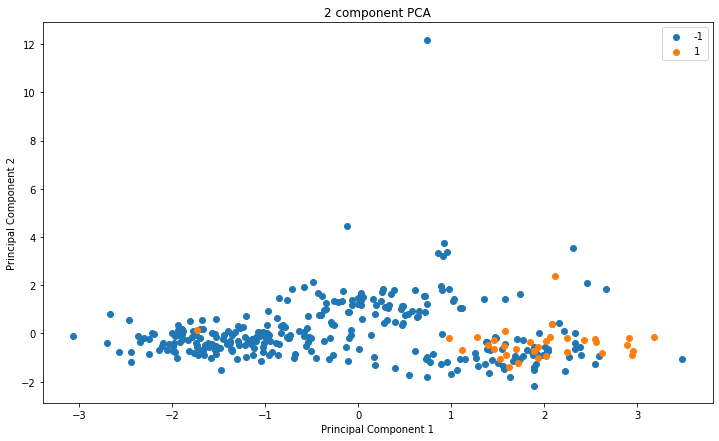

In [8]:
x = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

fig = plt.figure(figsize = (12,7))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('2 component PCA')

counter = Counter(y)

for label, _ in counter.items() :
    rowix = np.where(y == label)[0]
    ax.scatter(principalComponents[rowix, 0], principalComponents[rowix, 1], label=str(label))

ax.legend()

fig.show()
print(counter)

In [9]:
for i in range(X.shape[1]):
    print (i, len(np.unique(X[:, i])))

0 78
1 63
2 2
3 2
4 59
5 82
6 77


# check sets for categories

In [27]:
for X in datasets.keys() :

    print(X)

    for i in range(datasets[X]['data'].shape[1]):
        
        print (i, len(np.unique(datasets[X]['data'][:, i])))
        
    print("--------------------------------------------")

ecoli
0 78
1 63
2 2
3 2
4 59
5 82
6 77
--------------------------------------------
optical_digits
0 1
1 9
2 17
3 17
4 17
5 17
6 17
7 17
8 4
9 17
10 17
11 17
12 17
13 17
14 17
15 15
16 5
17 17
18 17
19 17
20 17
21 17
22 17
23 9
24 2
25 17
26 17
27 17
28 17
29 17
30 17
31 3
32 2
33 16
34 17
35 17
36 17
37 17
38 15
39 1
40 8
41 17
42 17
43 17
44 17
45 17
46 17
47 7
48 9
49 17
50 17
51 17
52 17
53 17
54 17
55 13
56 2
57 11
58 17
59 17
60 17
61 17
62 17
63 17
--------------------------------------------
satimage
0 51
1 84
2 76
3 102
4 51
5 82
6 76
7 103
8 50
9 81
10 78
11 104
12 51
13 83
14 78
15 101
16 50
17 80
18 77
19 104
20 50
21 80
22 78
23 104
24 51
25 82
26 75
27 102
28 50
29 81
30 77
31 103
32 50
33 80
34 77
35 104
--------------------------------------------
pen_digits
0 101
1 96
2 101
3 98
4 101
5 101
6 101
7 101
8 101
9 101
10 101
11 101
12 101
13 101
14 101
15 101
--------------------------------------------
abalone
0 2
1 2
2 2
3 134
4 111
5 51
6 2429
7 1515
8 880
9 926
-------

22 2410
23 2406
24 2403
25 2411
26 2411
27 2410
28 2413
29 2408
30 2406
31 2412
32 2407
33 2407
34 2408
35 2410
36 2412
37 2404
38 2411
39 2407
40 2404
41 2404
42 2407
43 2404
44 2409
45 2414
46 2407
47 2406
48 2407
49 2411
50 2409
51 2408
52 2408
53 2409
54 2407
55 2406
56 2413
57 2411
58 2414
59 2405
60 2410
61 2405
62 2407
63 2401
64 2410
65 2411
66 2407
67 2405
68 2409
69 2412
70 2409
71 2408
72 2409
73 2412
74 2410
75 2407
76 2410
77 2408
78 2409
79 2407
80 2404
81 2408
82 2405
83 2400
84 2401
85 2393
86 2401
87 2401
88 2403
89 2408
90 2406
91 2403
92 2403
93 2410
94 2403
95 2401
96 2404
97 2404
98 2400
99 2401
100 2405
101 2408
102 2405
--------------------------------------------
scene
0 2349
1 2346
2 2354
3 2343
4 2346
5 2346
6 2345
7 2349
8 2369
9 2361
10 2363
11 2372
12 2370
13 2365
14 2370
15 2378
16 2382
17 2379
18 2381
19 2380
20 2371
21 2367
22 2375
23 2383
24 2385
25 2383
26 2381
27 2366
28 2360
29 2378
30 2380
31 2385
32 2380
33 2362
34 2351
35 2336
36 2356
37 2367
38 2

204 2
205 2
206 2
207 2
208 2
209 2
210 2
211 2
212 2
213 2
214 2
215 2
216 2
217 2
218 2
219 2
220 2
221 2
222 2
223 2
224 2
225 2
226 2
227 2
228 2
229 2
230 2
231 2
232 2
233 2
234 2
235 2
236 2
237 2
238 2
239 2
240 2
241 2
242 2
243 2
244 2
245 2
246 2
247 2
248 2
249 2
250 2
251 2
252 2
253 2
254 2
255 2
256 2
257 2
258 2
259 2
260 2
261 2
262 2
263 2
264 2
265 2
266 2
267 2
268 2
269 2
270 2
271 2
272 2
273 2
274 2
275 2
276 2
277 2
278 2
279 2
280 2
281 2
282 2
283 2
284 2
285 2
286 2
287 2
288 2
289 2
290 2
291 2
292 2
293 2
294 2
295 2
296 2
297 2
298 2
299 2
--------------------------------------------
ozone_level
0 68
1 70
2 65
3 66
4 64
5 63
6 66
7 67
8 69
9 70
10 76
11 77
12 77
13 78
14 77
15 78
16 72
17 73
18 70
19 65
20 68
21 69
22 68
23 65
24 74
25 55
26 282
27 284
28 287
29 283
30 283
31 292
32 295
33 311
34 313
35 314
36 327
37 330
38 334
39 335
40 335
41 339
42 337
43 329
44 321
45 306
46 302
47 294
48 287
49 284
50 330
51 296
52 251
53 100
54 1289
55 1462
56 368
57

In [5]:
digits = datasets['optical_digits']

In [9]:
digits['data'].dtype

dtype('float64')

In [29]:
len(datasets.keys())

27

In [11]:
for X in datasets.keys() :

    print(X)
    
    v,c = np.unique(datasets[X]['target'], return_counts=True)
    print(v[0])
    print(v,c)        
    print("--------------------------------------------")

ecoli
-1
[-1  1] [301  35]
--------------------------------------------
optical_digits
-1
[-1  1] [5066  554]
--------------------------------------------
satimage
-1
[-1  1] [5809  626]
--------------------------------------------
pen_digits
-1
[-1  1] [9937 1055]
--------------------------------------------
abalone
-1
[-1  1] [3786  391]
--------------------------------------------
sick_euthyroid
-1
[-1  1] [2870  293]
--------------------------------------------
spectrometer
-1
[-1  1] [486  45]
--------------------------------------------
car_eval_34
-1
[-1  1] [1594  134]
--------------------------------------------
isolet
-1
[-1  1] [7197  600]
--------------------------------------------
us_crime
-1
[-1  1] [1844  150]
--------------------------------------------
yeast_ml8
-1
[-1  1] [2239  178]
--------------------------------------------
scene
-1
[-1  1] [2230  177]
--------------------------------------------
libras_move
-1
[-1  1] [336  24]
----------------------------------

In [15]:
def load_data(name) :
    
    data = datasets[name]

    X,y,title = data['data'], data['target'], data['DESCR']
    
    return X, y, title

In [13]:
def samples(X,y, smote=False) :
    
    
    
    if smote == True:
        o = sv.SMOTE(random_state = random_state)
    
        x_g, y_g = o.sample(X_train,y_train)
    
    else :
        x_g, y_g = X_train, y_train
        
    
    return x_g, y_g

In [14]:
def metrics_test(dataset_name,xdata,ydata, X_test, y_test, clf) :
    
    res = []
    
    clf.fit(xdata,ydata)
    
    prediction = clf.predict(X_test)
    proba = clf.predict_proba(X_test)[:,1]

    f_dict = {
        'name':dataset_name,
        'balanced acc': balanced_accuracy_score(y_test,prediction),
        'precision': precision_score(y_test,prediction),
        'recall': recall_score(y_test,prediction),
        'f1_score': f1_score(y_test, prediction, average='binary'),
        'geometric mean': geometric_mean_score(y_test, prediction),
        'average precision' : average_precision_score(y_test, prediction)
    }

    res.append(f_dict)
    
    return pd.DataFrame(res)

In [86]:
random_state = 5

clf = xgb.XGBClassifier()

totalres = []

for dataset in datasets.keys() :
    print(dataset)
    
    X,y,title = load_data(dataset)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = random_state)
    
    
    x_g, y_g = samples(X_train,y_train, clf)
    
    totalres.append(metrics_test(dataset, x_g, y_g, X_test, y_test, clf))

ecoli
[10:44:23] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
optical_digits
[10:44:23] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/tristenmarto/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


satimage
[10:44:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
pen_digits
[10:44:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
abalone
[10:44:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
sick_euthyroid
[10:44:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the defaul

/Users/tristenmarto/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


scene
[10:44:29] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
libras_move
[10:44:30] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
thyroid_sick
[10:44:30] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
coil_2000
[10:44:30] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default 

In [88]:
clf = xgb.XGBClassifier()

totalres_smote = []

for dataset in datasets.keys() :
    print(dataset)
    
    X,y,title = load_data(dataset)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = random_state)
    
    
    x_g, y_g = samples(X_train,y_train, smote=True)
    
    totalres_smote.append(metrics_test(dataset, x_g, y_g, X_test, y_test, clf))

2021-06-14 10:53:50,203:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': 5}")
2021-06-14 10:53:50,203:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': 5}")
/Users/tristenmarto/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
2021-06-14 10:53:50,320:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': 5}")
2021-06-14 10:53:50,320:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_job

ecoli
[10:53:50] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
optical_digits
[10:53:50] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/tristenmarto/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
2021-06-14 10:53:50,798:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': 5}")
2021-06-14 10:53:50,798:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': 5}")


satimage
[10:53:50] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/tristenmarto/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
2021-06-14 10:53:51,388:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': 5}")
2021-06-14 10:53:51,388:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': 5}")


pen_digits
[10:53:51] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/tristenmarto/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
2021-06-14 10:53:51,789:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': 5}")
2021-06-14 10:53:51,789:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': 5}")


abalone
[10:53:51] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/tristenmarto/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
2021-06-14 10:53:52,048:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': 5}")
2021-06-14 10:53:52,048:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': 5}")


sick_euthyroid
[10:53:52] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/tristenmarto/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
2021-06-14 10:53:52,399:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': 5}")
2021-06-14 10:53:52,399:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': 5}")
/Users/tristenmarto/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use

spectrometer
[10:53:52] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
car_eval_34
[10:53:52] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/tristenmarto/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
2021-06-14 10:53:52,754:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': 5}")
2021-06-14 10:53:52,754:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': 5}")


isolet


/Users/tristenmarto/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:53:53] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


2021-06-14 10:54:03,670:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': 5}")
2021-06-14 10:54:03,670:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': 5}")


us_crime
[10:54:03] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/tristenmarto/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
2021-06-14 10:54:04,153:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': 5}")
2021-06-14 10:54:04,153:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': 5}")


yeast_ml8
[10:54:04] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/tristenmarto/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
2021-06-14 10:54:05,329:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': 5}")
2021-06-14 10:54:05,329:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': 5}")


scene
[10:54:05] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/tristenmarto/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
2021-06-14 10:54:07,754:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': 5}")
2021-06-14 10:54:07,754:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': 5}")
/Users/tristenmarto/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use

libras_move
[10:54:07] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
thyroid_sick
[10:54:07] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/tristenmarto/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
2021-06-14 10:54:08,286:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': 5}")
2021-06-14 10:54:08,286:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': 5}")


coil_2000
[10:54:08] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/tristenmarto/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
2021-06-14 10:54:09,873:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': 5}")
2021-06-14 10:54:09,873:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': 5}")
/Users/tristenmarto/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use

arrhythmia
[10:54:09] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
solar_flare_m0
[10:54:10] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/tristenmarto/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
2021-06-14 10:54:10,206:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': 5}")
2021-06-14 10:54:10,206:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': 5}")
/Users/tristenmarto/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use

oil
[10:54:10] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
car_eval_4
[10:54:10] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/tristenmarto/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
2021-06-14 10:54:10,458:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': 5}")
2021-06-14 10:54:10,458:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': 5}")
/Users/tristenmarto/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use

wine_quality
[10:54:10] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


2021-06-14 10:54:10,817:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': 5}")
2021-06-14 10:54:10,817:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': 5}")


letter_img
[10:54:10] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/tristenmarto/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
2021-06-14 10:54:11,681:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': 5}")
2021-06-14 10:54:11,681:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': 5}")


yeast_me2
[10:54:11] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
webpage


/Users/tristenmarto/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
2021-06-14 10:54:12,021:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': 5}")
2021-06-14 10:54:12,021:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': 5}")
/Users/tristenmarto/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use

[10:54:12] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


2021-06-14 10:54:24,294:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': 5}")
2021-06-14 10:54:24,294:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': 5}")


ozone_level
[10:54:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/tristenmarto/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
2021-06-14 10:54:24,766:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': 5}")
2021-06-14 10:54:24,766:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': 5}")


mammography
[10:54:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/tristenmarto/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
2021-06-14 10:54:25,544:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': 5}")
2021-06-14 10:54:25,544:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': 5}")


protein_homo


/Users/tristenmarto/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:54:26] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


2021-06-14 10:55:03,951:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': 5}")
2021-06-14 10:55:03,951:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': 5}")


abalone_19
[10:55:03] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/tristenmarto/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [89]:
df = pd.DataFrame(totalres[0])

for i in range(1,len(totalres)) :
    df = df.append(totalres[i])
    
df.set_index('name')

,balanced acc,precision,recall,f1_score,geometric mean,average precision
name,,,,,,
ecoli,0.976190,0.545455,1.000000,0.705882,0.975900,0.545455
optical_digits,0.949403,0.987805,0.900000,0.941860,0.948117,0.898728
satimage,0.787401,0.805195,0.590476,0.681319,0.762379,0.515938
pen_digits,0.995397,0.994253,0.991404,0.992826,0.995389,0.986533
abalone,0.553108,0.339623,0.134328,0.192513,0.361320,0.129740
sick_euthyroid,0.927657,0.926316,0.862745,0.893401,0.925383,0.812584
spectrometer,0.872919,0.812500,0.764706,0.787879,0.866186,0.644051
car_eval_34,0.957587,0.944444,0.918919,0.931507,0.956806,0.873122
isolet,0.891929,0.956790,0.786802,0.863510,0.885712,0.769121


In [64]:
df2 = pd.DataFrame(totalres_smote[0])

for i in range(1,len(totalres_smote)) :
    df2 = df2.append(totalres_smote[i])
    
df2.set_index('name')

,balanced acc,precision,recall,f1_score,geometric mean,average precision
name,,,,,,
ecoli,0.614286,0.153846,0.333333,0.210526,0.546272,0.087318
optical_digits,0.891940,0.842105,0.800000,0.820513,0.887189,0.693091
satimage,0.759419,0.490040,0.585714,0.533623,0.739286,0.327984
pen_digits,0.975460,0.943503,0.957020,0.950213,0.975286,0.907086
abalone,0.597680,0.222222,0.313433,0.260062,0.525761,0.136367
sick_euthyroid,0.905645,0.741379,0.843137,0.788991,0.903485,0.640410
spectrometer,0.824639,0.571429,0.705882,0.631579,0.816043,0.431770
car_eval_34,0.930560,0.941176,0.864865,0.901408,0.928238,0.822747
isolet,0.864093,0.655022,0.761421,0.704225,0.857972,0.517007


In [23]:
def samples_synth(X,y) :
    
    o = synthsonic(random_state = random_state)

    x_g, y_g = o.sample(X_train,y_train)
        
    
    return x_g, y_g

In [58]:
clf = DecisionTreeClassifier(random_state = random_state)

for dataset in a[-7:] :
    print(dataset)
    
    X,y,title = load_data(dataset)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = random_state)
    
    
    x_g, y_g = samples_synth(X_train,y_train)
    
    totalres_synth.append(metrics_test(dataset, x_g, y_g, X_test, y_test, clf))

2021-06-10 12:24:49,742:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 1.0, 'n_jobs': 1, 'distinct_threshold': -1, 'random_state': RandomState(MT19937) at 0x7F88A28D5490}")
2021-06-10 12:24:49,742:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 1.0, 'n_jobs': 1, 'distinct_threshold': -1, 'random_state': RandomState(MT19937) at 0x7F88A28D5490}")
n_quantiles (500) is greater than the total number of samples (495). n_quantiles is set to num samples.


letter_img
minority class 1, min dataset (495, 16)


Building tree: 100%|██████████| 105/105.0 [00:00<00:00, 1149.46it/s]
Generating for node: 14: 100%|██████████| 16/16 [00:01<00:00, 13.63it/s]
2021-06-10 12:25:01,364:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 1.0, 'n_jobs': 1, 'distinct_threshold': -1, 'random_state': RandomState(MT19937) at 0x7F88F18D4D10}")
2021-06-10 12:25:01,364:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 1.0, 'n_jobs': 1, 'distinct_threshold': -1, 'random_state': RandomState(MT19937) at 0x7F88F18D4D10}")
n_quantiles (500) is greater than the total number of samples (32). n_quantiles is set to num samples.


yeast_me2
minority class 1, min dataset (32, 8)


Building tree: 100%|██████████| 21/21.0 [00:00<00:00, 3522.23it/s]
Generating for node: 0:   0%|          | 0/8 [00:00<?, ?it/s]/Users/tristenmarto/anaconda3/lib/python3.7/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:522: UserWarning: Found unknown state name. Trying to switch to using all state names as state numbers
  "Found unknown state name. Trying to switch to using all state names as state numbers"
Generating for node: 4: 100%|██████████| 8/8 [00:01<00:00,  5.26it/s]
/Users/tristenmarto/anaconda3/lib/python3.7/site-packages/sklearn/isotonic.py:71: UserWarning: Confidence interval of the Spearman correlation coefficient spans zero. Determination of ``increasing`` may be suspect.
  warnings.warn("Confidence interval of the Spearman "
Generating for node: 0:   0%|          | 0/8 [00:00<?, ?it/s]/Users/tristenmarto/anaconda3/lib/python3.7/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:522: UserWarning: Found unknown state name. Trying to switch to using all state n

webpage
minority class 1, min dataset (669, 300)


Building tree: 100%|██████████| 44551/44551.0 [00:49<00:00, 909.19it/s]
Generating for node: 290: 100%|██████████| 300/300 [00:30<00:00,  9.80it/s]
2021-06-10 12:32:00,891:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 1.0, 'n_jobs': 1, 'distinct_threshold': -1, 'random_state': RandomState(MT19937) at 0x7F88F18D4D10}")
2021-06-10 12:32:00,891:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 1.0, 'n_jobs': 1, 'distinct_threshold': -1, 'random_state': RandomState(MT19937) at 0x7F88F18D4D10}")
n_quantiles (500) is greater than the total number of samples (38). n_quantiles is set to num samples.


ozone_level
minority class 1, min dataset (38, 72)


ValueError: n_components=72 must be between 0 and min(n_samples, n_features)=38 with svd_solver='full'

In [59]:
len(totalres_synth)

17

In [63]:
df3 = totalres_synth[0]

for i in range(1,len(totalres_synth)) :
    df3 = df3.append(totalres_smote[i])
    
df3.set_index('name')

,balanced acc,precision,recall,f1_score,geometric mean,average precision
name,,,,,,
ecoli,0.790476,0.307692,0.666667,0.421053,0.780720,0.223146
optical_digits,0.891940,0.842105,0.800000,0.820513,0.887189,0.693091
satimage,0.759419,0.490040,0.585714,0.533623,0.739286,0.327984
pen_digits,0.975460,0.943503,0.957020,0.950213,0.975286,0.907086
abalone,0.597680,0.222222,0.313433,0.260062,0.525761,0.136367
sick_euthyroid,0.905645,0.741379,0.843137,0.788991,0.903485,0.640410
spectrometer,0.824639,0.571429,0.705882,0.631579,0.816043,0.431770
car_eval_34,0.930560,0.941176,0.864865,0.901408,0.928238,0.822747
isolet,0.864093,0.655022,0.761421,0.704225,0.857972,0.517007


In [36]:
datasets = fetch_datasets()
total = []

for name in datasets :
    print(name)
    
    x,y,name = load_data(name)
    
    # find categorical columns
    cat = num = 0
    
    for i in range(x.shape[1]) :
        if len(np.unique(x[:, i])) > 20 :
            num += 1
        else :
            cat += 1
    
    
    # imb ratio
    v,c = np.unique(y,return_counts = True)
    majority = c[0]
    minority = c[1]
    ratio = minority/x.shape[0]*100
    
    
    f_dict = {
        'dataset': name,
        'size': x.shape[0],
        'features': x.shape[1],
        'numerical_features': num,
        'categorical_features': cat,
        'majority' : majority,
        'minority' : minority,
        'percentage_minority_of_dataset' : ratio
    }
    
    total.append(f_dict)

ecoli
optical_digits
satimage
pen_digits
abalone
sick_euthyroid
spectrometer
car_eval_34
isolet
us_crime
yeast_ml8
scene
libras_move
thyroid_sick
coil_2000
arrhythmia
solar_flare_m0
oil
car_eval_4
wine_quality
letter_img
yeast_me2
webpage
ozone_level
mammography
protein_homo
abalone_19


In [38]:
df = pd.DataFrame(total)
result_path = '/Users/tristenmarto/Documents/Studie/Thesis/Synthsonic_data_analysis/CSV_results/'
df.to_csv(result_path+"dataset_info.csv", index=False)